In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Load the dataset from a CSV file
Hitters = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ISLR/Hitters.csv')
Hitters.drop(['rownames'], axis=1, inplace=True)
df = Hitters

# Remove rows with missing values
df = df.dropna()

# Prepare the data for regression
X = pd.get_dummies(df.drop('Salary', axis=1), drop_first=True)
y = df['Salary']

In [4]:
# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import Ridge
# Define the model
ridge = Ridge()
# Define the grid search
# Define the grid of alpha values
alphas = np.logspace(-6, 6, 200)
# print(alphas)

# Define the grid search
ridge_cv = GridSearchCV(estimator=ridge, param_grid={'alpha': alphas}, cv=10, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Extract the best alpha value
best_alpha_ridge = ridge_cv.best_params_['alpha']
# print(dir(ridge_cv))
# Fit the Ridge model using the best alpha on training data
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)

# Print the coefficients of the Ridge model
print("Ridge Coefficients (Best Alpha):", ridge_model.coef_)
print(ridge_model.intercept_)

Ridge Coefficients (Best Alpha): [ -66.00851158   37.6624573   -53.05939595    8.11332126   39.88925905
   78.80776782 -120.74625771   -5.11045224  117.29666967   66.7165141
  137.36408032   98.01501657  -54.92635448   93.13198473   43.1211885
  -42.25370807   28.27864529  -74.1132902   -12.16786472]
546.6096358695652


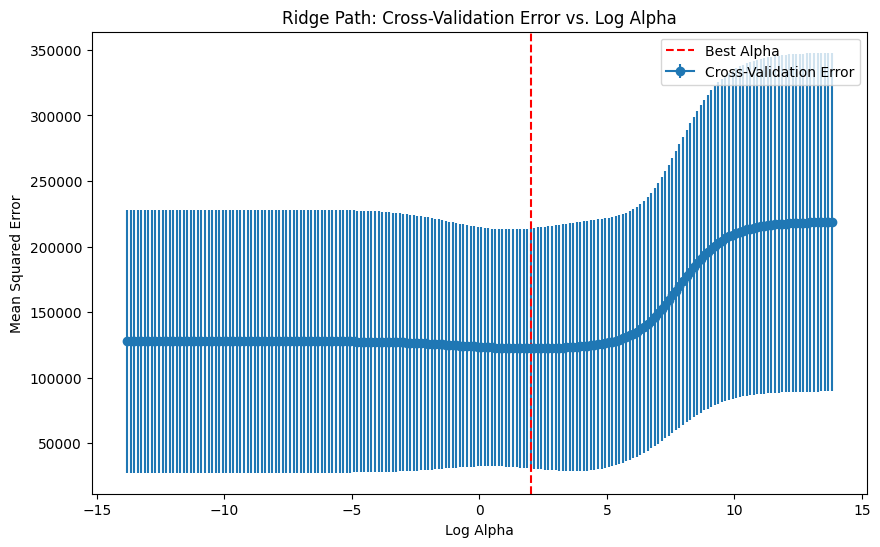

In [6]:
# Plotting the cross-validation error as a function of log(alpha)
mean_cv_errors = -ridge_cv.cv_results_['mean_test_score']
std_cv_errors = ridge_cv.cv_results_['std_test_score']


plt.figure(figsize=(10, 6))
plt.errorbar(np.log(alphas), mean_cv_errors, yerr=std_cv_errors, label='Cross-Validation Error', fmt='-o')
plt.axvline(np.log(best_alpha_ridge), linestyle='--', color='r', label='Best Alpha')
plt.xlabel('Log Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Path: Cross-Validation Error vs. Log Alpha')
plt.legend()
plt.show()

In [7]:
print(best_alpha_ridge)


7.488103857590015


In [8]:
print(np.log(best_alpha_ridge))


2.0133156089495667


In [9]:
# Evaluate the Ridge model on the training data without cross validation
ridge_predictions_train = ridge_model.predict(X_train)
ridge_mse_train = mean_squared_error(y_train, ridge_predictions_train)
ridge_rmse_train = np.sqrt(ridge_mse_train)

print("Ridge Training MSE (Best Alpha):", ridge_mse_train)
print("Ridge Training RMSE (Best Alpha):", ridge_rmse_train)

# Evaluate the Ridge model on the test data
ridge_predictions_test = ridge_model.predict(X_test)
ridge_mse_test = mean_squared_error(y_test, ridge_predictions_test)
ridge_rmse_test = np.sqrt(ridge_mse_test)

print("Ridge Test MSE (Best Alpha):", ridge_mse_test)
print("Ridge Test RMSE (Best Alpha):", ridge_rmse_test)

Ridge Training MSE (Best Alpha): 93532.18269321024
Ridge Training RMSE (Best Alpha): 305.8303168314257
Ridge Test MSE (Best Alpha): 128888.95422551778
Ridge Test RMSE (Best Alpha): 359.0110781375942


In [10]:
# Fit the Ridge model using the best alpha on training data with CV
ridge_model_cv = RidgeCV(alphas=[best_alpha_ridge], cv = 10)
ridge_model_cv.fit(X_train, y_train)

# Print the coefficients of the Ridge model with CV
print("Ridge Coefficients (Best Alpha with cv ):", ridge_model_cv.coef_)

# Evaluate the Ridge model on the training data
ridge_predictions_train = ridge_model_cv.predict(X_train)
ridge_mse_train = mean_squared_error(y_train, ridge_predictions_train)
ridge_rmse_train = np.sqrt(ridge_mse_train)

print("Ridge Training MSE (Best Alpha) with CV:", ridge_mse_train)
print("Ridge Training RMSE (Best Alpha) with CV:", ridge_rmse_train)

# Evaluate the Ridge model on the test data
ridge_predictions_test = ridge_model_cv.predict(X_test)
ridge_mse_test = mean_squared_error(y_test, ridge_predictions_test)
ridge_rmse_test = np.sqrt(ridge_mse_test)

print("Ridge Test MSE (Best Alpha) with CV:", ridge_mse_test)
print("Ridge Test RMSE (Best Alpha) with CV:", ridge_rmse_test)

Ridge Coefficients (Best Alpha with cv ): [ -66.00851158   37.6624573   -53.05939595    8.11332126   39.88925905
   78.80776782 -120.74625771   -5.11045224  117.29666967   66.7165141
  137.36408032   98.01501657  -54.92635448   93.13198473   43.1211885
  -42.25370807   28.27864529  -74.1132902   -12.16786472]
Ridge Training MSE (Best Alpha) with CV: 93532.18269321024
Ridge Training RMSE (Best Alpha) with CV: 305.8303168314257
Ridge Test MSE (Best Alpha) with CV: 128888.95422551778
Ridge Test RMSE (Best Alpha) with CV: 359.0110781375942


In [11]:
# Perform cross-validation for Lasso regression on training data using scikit-learn
lasso_cv = LassoCV(alphas=alphas, cv=10, random_state=123)
lasso_cv.fit(X_train, y_train)

# Extract the best alpha value
best_alpha_lasso = lasso_cv.alpha_
print(best_alpha_lasso)
# Fit the Lasso model using the best alpha on training data
lasso_model = LassoCV(alphas=[best_alpha_lasso], cv=10)
lasso_model.fit(X_train, y_train)

# Print the coefficients of the Lasso model
print("Lasso Coefficients (Best Alpha):", lasso_model.coef_)
print("Lasso intercept (Best Alpha):", lasso_model.intercept_)


4.937047852839004
Lasso Coefficients (Best Alpha): [  -0.            3.22887632  -24.45505468    0.            0.71391675
   65.66991269 -127.99478908   -0.           19.43872013    0.
  187.53582197  189.29208597  -30.98070563   90.32991579   26.73196072
  -31.20047677   15.3996252   -73.57899697    0.        ]
Lasso intercept (Best Alpha): 546.6096358695652


In [12]:
# Evaluate the Lasso model on the training data
lasso_predictions_train = lasso_model.predict(X_train)
lasso_mse_train = mean_squared_error(y_train, lasso_predictions_train)
lasso_rmse_train = np.sqrt(lasso_mse_train)

print("Lasso Training MSE (Best Alpha):", lasso_mse_train)
print("Lasso Training RMSE (Best Alpha):", lasso_rmse_train)

# Evaluate the Lasso model on the test data
lasso_predictions_test = lasso_model.predict(X_test)
lasso_mse_test = mean_squared_error(y_test, lasso_predictions_test)
lasso_rmse_test = np.sqrt(lasso_mse_test)

print("Lasso Test MSE (Best Alpha):", lasso_mse_test)
print("Lasso Test RMSE (Best Alpha):", lasso_rmse_test)

Lasso Training MSE (Best Alpha): 95161.86849783998
Lasso Training RMSE (Best Alpha): 308.4831737677762
Lasso Test MSE (Best Alpha): 133866.6516031195
Lasso Test RMSE (Best Alpha): 365.87791898817767


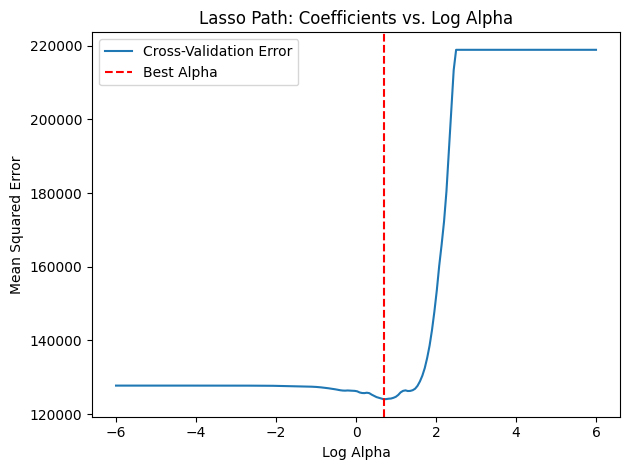

In [13]:
# Plotting the coefficients as a function of alpha for Lasso
plt.plot(np.log10(lasso_cv.alphas_), lasso_cv.mse_path_.mean(axis=1), label='Cross-Validation Error')
plt.axvline(np.log10(best_alpha_lasso), linestyle='--', color='r', label='Best Alpha')
plt.xlabel('Log Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Path: Coefficients vs. Log Alpha')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
# Define the grid of alpha values and l1_ratios
alphas = np.logspace(-6, 6, 200)
l1_ratios = np.linspace(0, 1, 10)

# Perform cross-validation to find the best alpha and l1_ratio
elasticnet_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10, random_state=123)
elasticnet_cv.fit(X_train, y_train)

# Extract the best alpha and l1_ratio values
best_alpha_elasticnet = elasticnet_cv.alpha_
best_l1_ratio_elasticnet = elasticnet_cv.l1_ratio_
print(f"Best alpha for Elastic Net: {best_alpha_elasticnet}")
print(f"Best l1_ratio for Elastic Net: {best_l1_ratio_elasticnet}")

Best alpha for Elastic Net: 0.043976036093027214
Best l1_ratio for Elastic Net: 0.0


In [15]:
# Fit the Elastic Net model using the best alpha and l1_ratio on training data
elasticnet_model = ElasticNet(alpha=best_alpha_elasticnet, l1_ratio=best_l1_ratio_elasticnet)
elasticnet_model.fit(X_train, y_train)

# Print the coefficients and intercept of the Elastic Net model
print("Elastic Net Coefficients (Best Alpha and l1_ratio):", elasticnet_model.coef_)
print("Elastic Net Intercept:", elasticnet_model.intercept_)
print("Log of Best Alpha for Elastic Net:", np.log(best_alpha_elasticnet))

Elastic Net Coefficients (Best Alpha and l1_ratio): [ -62.64924269   36.69849636  -52.43738002    8.71600964   38.67646835
   77.3624101  -118.30111625   -1.68583102  113.89728077   67.11789942
  133.01005572   96.75409246  -51.95196385   92.86157435   42.22234106
  -41.91655158   27.97230313  -73.93387783  -11.69856957]
Elastic Net Intercept: 546.6096358695652
Log of Best Alpha for Elastic Net: -3.124110427680363


In [16]:
# Evaluate the Elastic Net model on the training data
elasticnet_predictions_train = elasticnet_model.predict(X_train)
elasticnet_mse_train = mean_squared_error(y_train, elasticnet_predictions_train)
elasticnet_rmse_train = np.sqrt(elasticnet_mse_train)

print("Elastic Net Training MSE (Best Alpha):", elasticnet_mse_train)
print("Elastic Net Training RMSE (Best Alpha):", elasticnet_rmse_train)

# Evaluate the Elastic Net model on the test data
elasticnet_predictions_test = elasticnet_model.predict(X_test)
elasticnet_mse_test = mean_squared_error(y_test, elasticnet_predictions_test)
elasticnet_rmse_test = np.sqrt(elasticnet_mse_test)

print("Elastic Net Test MSE (Best Alpha):", elasticnet_mse_test)
print("Elastic Net Test RMSE (Best Alpha):", elasticnet_rmse_test)

Elastic Net Training MSE (Best Alpha): 93708.65867060532
Elastic Net Training RMSE (Best Alpha): 306.1187002954986
Elastic Net Test MSE (Best Alpha): 128671.8608290268
Elastic Net Test RMSE (Best Alpha): 358.7086015542794
